In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Load data

In [2]:
ds = pd.read_csv('data.csv')

pure = ds.drop(columns=['milliseconds', 'as5048a'])
pure_np = pure.iloc[:,2:-1].values
pure_np[12013:,2]+=0.1
x = pure_np
x = x / np.linalg.norm(x)

Data preprocessing

In [3]:
from sklearn.metrics import matthews_corrcoef
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [3]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
y = [0]*12013+[1]*1000
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x,y)

Using TensorFlow backend.


In [5]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x, y = pipeline.fit_resample(x, y)
x_train, x_test1, y_train, y_test1 = train_test_split(x,y)
rng = np.random.RandomState(42)

Isolation Forest

In [5]:
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(x_train)
y_pred = clf.predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))
print(matthews_corrcoef(y_test, y_pred))

0.3333333333333333
0.051897435897435895


D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'matthews_corrcoef' is not defined

KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier  

In [8]:
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

In [175]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
X_2d = tsne.fit_transform(x)

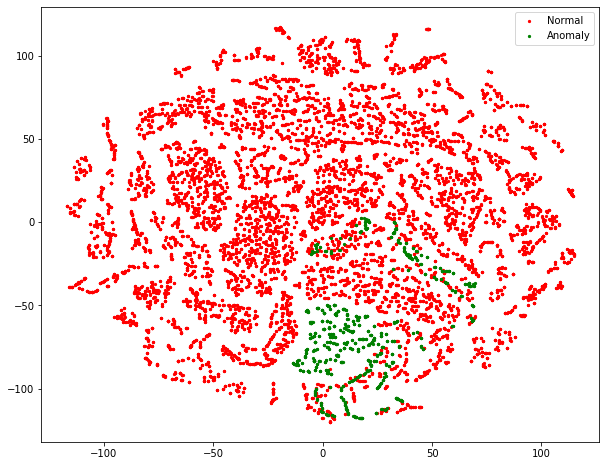

In [170]:
plt.figure(figsize=(10, 8))
colors = ['r', 'g']
plt.scatter(X_2d[:12013,0],X_2d[:12013,1],color='r',marker='o',s=5,label='Normal')
plt.scatter(X_2d[12013:,0],X_2d[12013:,1],color='g',s=5,label='Anomaly')

plt.legend()
plt.savefig('scat3.jpg')
plt.show()

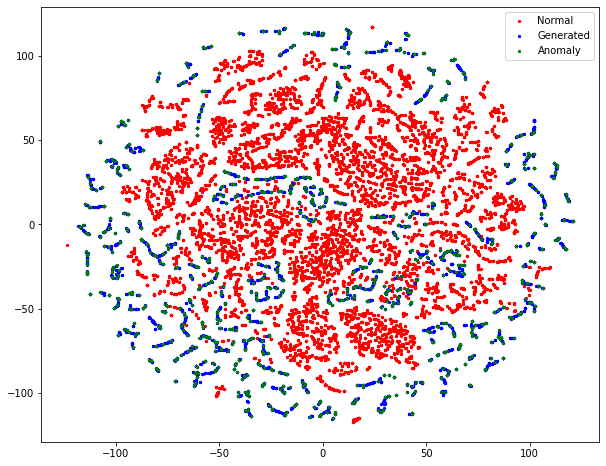

In [214]:
plt.figure(figsize=(10, 8))
colors = ['r', 'g']
plt.scatter(X_2d[:12013,0],X_2d[:12013,1],color='r',marker='o',s=5,label='Normal')
plt.scatter(X_2d[13013:,0],X_2d[13013:,1],color='b',s=5,label='Generated')
plt.scatter(X_2d[12013:13013,0],X_2d[12013:13013,1],color='g',s=5,label='Anomaly')

plt.legend()
plt.savefig('scat4.jpg')
plt.show()

In [208]:
X_2d.shape

(18018, 2)

In [7]:
neigh = KNeighborsClassifier(n_neighbors=100)  
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))
print(matthews_corrcoef(y_test, y_pred))

0.7889682358844812
0.8312493020738109


NameError: name 'matthews_corrcoef' is not defined

Naive Bayesian Gaussian Multi Variant

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=1e-5)
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9519415794208255
0.8138789441552787


In [23]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=1e-5)
y_pred = clf.fit(x_train, y_train).predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9273647914463294
0.8336906221859125


LOF

In [24]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(x)


In [25]:
y_pred = [0 if i < 0 else i for i in y_pred]
print(recall_score(y, y_pred, average='macro'))
print(f1_score(y, y_pred, average='macro'))

0.5116210355448264
0.1499002438038599


ABOD

In [27]:
from pyod.models.abod import ABOD

In [28]:
clf = ABOD()
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.5335757646002057
0.17576775809193135


D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
D:\ANACONDA\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\ANACONDA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\ANACONDA\lib\site-packages\pyod\models\base.py:168: RuntimeWarning: invalid value encountered in greater
  return (pred_score > self.threshold_).astype('int').ravel()


Auto encoder

In [29]:
from pyod.models.auto_encoder import AutoEncoder

In [30]:
clf = AutoEncoder(epochs=30, contamination=0.001, hidden_neurons=[33,16,16,33])
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 27)                756       
_________________________________________________________________
dropout_1 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                756       
_________________________________________________________________
dropout_2 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 33)                924       
_________________________________________________________________
dropout_3 (Dropout)          (None, 33)                0         
________________________________________________

CBLOF

In [32]:
from pyod.models.cblof import CBLOF

clf = CBLOF(random_state=rng)
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.5081942382842083
0.1689730825519572


OCSVM

In [31]:
from pyod.models.ocsvm import OCSVM

clf = OCSVM()
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.5229817992158081
0.16653897743363255
